In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, fmin_l_bfgs_b, minimize, line_search
import pybobyqa

# Função
f(x1, x2, x3) = - (100(x1 - x2²) - (x1 - 1)² + 90(x2 - x3²) - (x2 - 1)²)

deriv_x1 = -102+2*x1

deriv_x2 = -92+202*x2

deriv_x3 = +180*x3

In [112]:
tol = 0.00001 #precisão ou tolerancia
ln = 0.000001 # Learning rate
initial_values = np.array([0.5, 0.5, 0.5])

count_function_call = 0

def function(x1, x2, x3):
    global count_function_call
    count_function_call += 1
    return -(100*(x1 - (x2**2)) - (x1-1)**2 + 90*(x2-(x3**2)) - (x2 - 1)**2)

def function_param(params):
    x1, x2, x3 = params
    return function(x1, x2, x3)

def deriv_f_x1():
    pass

def deriv_x1(x1):
    return -102+2*x1

def deriv_x2(x2):
    return -92+202*x2

def deriv_x3(x3):
    return 180*x3


# 2.1 Descida do gradiente

Valores para os x`s:  [-0.00018837909898333687, 0.5759959094323092, 1.2138692626168834]


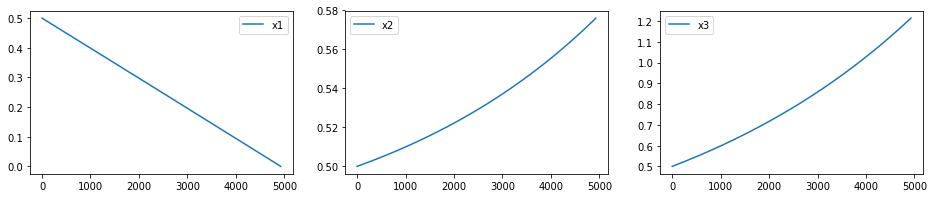

<Figure size 432x288 with 0 Axes>

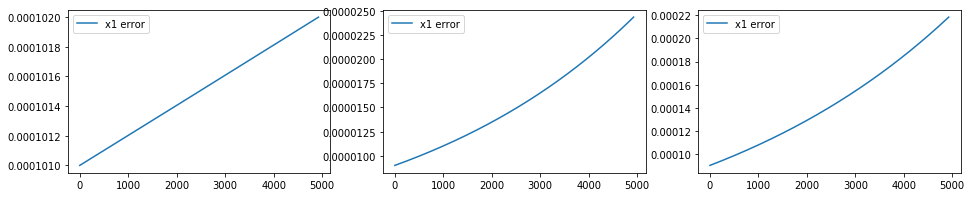

<Figure size 432x288 with 0 Axes>

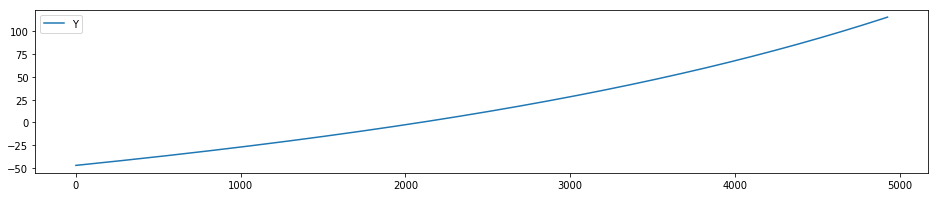

In [123]:
def gradient_descent(x1, x2 ,x3, ln, precision):
    
    xs_hist = []
    precision_hist = []
    y_list = []
    
    x1_prev = 99999999999
    
    while (abs(x1 - x1_prev)/x1_prev) > precision:

        x1_prev = x1
        x2_prev = x2
        x3_prev = x3
        
        x1 = x1 - (ln * (102 - (2*x1)))
        x2 = x2 - (ln * (92 - (202*x2)))
        x3 = x3 - (ln * (-180 * x3))

        xs_hist.append([x1 ,x2, x3]) #Salva os x's encontrados nessa iteração
        
        #Histórico do erro relativo
        precision_hist.append([abs(x1 - x1_prev), abs(x2 - x2_prev), abs(x3 - x3_prev)])
        
        y_list.append(function(x1, x2, x3))
    
    xs_hist = np.array(xs_hist)
    precision_hist = np.array(precision_hist)
    print("Valores para os x`s: ", [x1 ,x2, x3])
    
    iterations = len(xs_hist)
    
    fig=plt.figure(figsize=(16, 3))
    fig.add_subplot(1, 3, 1)
    plt.plot(range(iterations), xs_hist[:,0], label="x1")
    plt.legend()
    fig.add_subplot(1, 3, 2)
    plt.plot(range(iterations), xs_hist[:,1], label="x2")
    plt.legend()
    fig.add_subplot(1, 3, 3)
    plt.plot(range(iterations), xs_hist[:,2], label="x3")
    plt.legend()
    plt.figure()
    
    #plot erro relativo
    fig=plt.figure(figsize=(16, 3))
    fig.add_subplot(1, 3, 1)
    plt.plot(range(iterations), precision_hist[:,0], label="x1 error")
    plt.legend()
    fig.add_subplot(1, 3, 2)
    plt.plot(range(iterations), precision_hist[:,1], label="x1 error")
    plt.legend()
    fig.add_subplot(1, 3, 3)
    plt.plot(range(iterations), precision_hist[:,2], label="x1 error")
    plt.legend()
    plt.figure()

    #plot Y
    fig=plt.figure(figsize=(16, 3))
    plt.plot(range(iterations), y_list[:], label="Y")
    plt.legend()


gradient_descent(0.5, 0.5, 0.5, ln, tol)

# 2.2 Descida do gradiente com busca em linha - Antes da Aula

In [114]:
min_x1 = minimize_scalar(deriv_x1, bounds=(-10, 10), method='Bounded')
min_x2 = minimize_scalar(deriv_x2, bounds=(-10, 10), method='Bounded')
min_x3 = minimize_scalar(deriv_x3, bounds=(-10, 10), method='Bounded')

for params in [(1, str(min_x1.x), min_x1.nfev),(2, str(min_x2.x), min_x2.nfev),(3, str(min_x3.x), min_x3.nfev)]:
    print("Mínimo de X%s acontece em %s, com %s iterações"% params)

Mínimo de X1 acontece em -9.99999335625205, com 31 iterações
Mínimo de X2 acontece em -9.99999335625205, com 31 iterações
Mínimo de X3 acontece em -9.99999335625205, com 31 iterações


# 2.2 Descida do gradiente com busca em linha - Depois da Aula

In [115]:
def test_grad(x):
    return [deriv_x1(x[0]), deriv_x2(x[1]), deriv_x3(x[2])]

res = line_search(function_param, test_grad, initial_values, np.array([1, 1, 1]))
print("Alpha: ", res[0])
print("# chamadas da função: ", res[1])
print("# chamadas da func gradiente: ", res[2])
print(res[3])
print(res[4])
print(res[5])

Alpha:  0.005208333333333333
# chamadas da função:  8
# chamadas da func gradiente:  1
-47.005208333333336
-47.0
[-100.98958333333333, 10.052083333333343, 90.9375]


# 2.3 L-BFGS

In [116]:
min_l_bfgs = minimize(function_param, initial_values, method="L-BFGS-B",
                      bounds=[(-10, 10), (-10, 10), (-10, 10)], tol=tol)    

print(min_l_bfgs)
print("Mínimo de F() %s acontece em %s, com %s chamadas a função" % 
      (min_l_bfgs.fun, min_l_bfgs.x, min_l_bfgs.nfev))

      fun: -938.9504950491494
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.20000082e+01, -3.75166564e-04, -6.82121026e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
   status: 0
  success: True
        x: array([ 1.00000000e+01,  4.55443700e-01, -3.62461516e-07])
Mínimo de F() -938.9504950491494 acontece em [ 1.00000000e+01  4.55443700e-01 -3.62461516e-07], com 36 chamadas a função


# 2.4 Nelder-Mead

In [117]:
initial_simplex = np.zeros((4,3))

initial_simplex2 = np.array([
    [2, 3, 4],
    [2, 3, 4],
    [2, 3, 4],
    [2, 3, 4],
])

initial_simplex3 = np.ones((4,3))


initial_simplex3 = np.ones((4,3))

for i_simplex in [initial_simplex, initial_simplex2, initial_simplex3]:
    minimize(function_param, initial_values, method="Nelder-Mead", tol=tol,
             options={'disp':True, 'initial_simplex':i_simplex, 'xatol': tol}) 

Optimization terminated successfully.
         Current function value: 2.000000
         Iterations: 1
         Function evaluations: 4
Optimization terminated successfully.
         Current function value: 1875.000000
         Iterations: 1
         Function evaluations: 4
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 4


# 2.5 NEWUOA ou BOBYQA

In [118]:
#Usando bobyqa
lower = np.array([-10.0, -10.0, -10.0])
upper = np.array([10, 10, 10])

soln = pybobyqa.solve(function_param, initial_values, bounds=(lower,upper), seek_global_minimum=True)
print(soln)

****** Py-BOBYQA Results ******
Solution xmin = [ 1.00000000e+01  4.55445545e-01 -1.56941196e-12]
Objective value f(xmin) = -938.950495
Needed 400 objective evaluations (at 400 points)
Did a total of 11 runs
Approximate gradient = [-8.20000183e+01 -8.15615998e-06  1.58726441e-05]
Approximate Hessian = [[-336.83796389 -277.49612422  271.42795213]
 [-277.49612422 2152.01320131  449.6134669 ]
 [ 271.42795213  449.6134669  3662.5205415 ]]
Exit flag = 1
Warning (max evals): Objective has been called MAXFUN times
******************************

